In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
# Upload the fitting results for the C12 model with beta fixed at 2.0
bat_c12 = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

In [4]:
# Upload the fitting results for the C12 model with beta free
bat_c12_beta_free = pd.read_csv('../data/bat-agn-c12-params_beta_free.csv', index_col=0)

In [9]:
# Add in quadrature an uncertainty of 0.15 for f_AGN and 0.2 dex for the luminosities
bat_c12['agn_frac_err_high'] = np.sqrt(bat_c12['agn_frac_err_high']**2 + 0.15**2)
bat_c12['agn_frac_err_low'] = np.sqrt(bat_c12['agn_frac_err_low']**2 + 0.15**2)
bat_c12['lir_sf_err_high'] = np.sqrt(bat_c12['lir_sf_err_high']**2 + 0.2**2)
bat_c12['lir_sf_err_low'] = np.sqrt(bat_c12['lir_sf_err_low']**2 + 0.2**2)
bat_c12['lir_agn_err_high'] = np.sqrt(bat_c12['lir_agn_err_high']**2 + 0.2**2)
bat_c12['lir_agn_err_low'] = np.sqrt(bat_c12['lir_agn_err_low']**2 + 0.2**2)

bat_c12_beta_free['agn_frac_err_high'] = np.sqrt(bat_c12_beta_free['agn_frac_err_high']**2 + 0.15**2)
bat_c12_beta_free['agn_frac_err_low'] = np.sqrt(bat_c12_beta_free['agn_frac_err_low']**2 + 0.15**2)
bat_c12_beta_free['lir_sf_err_high'] = np.sqrt(bat_c12_beta_free['lir_sf_err_high']**2 + 0.2**2)
bat_c12_beta_free['lir_sf_err_low'] = np.sqrt(bat_c12_beta_free['lir_sf_err_low']**2 + 0.2**2)
bat_c12_beta_free['lir_agn_err_high'] = np.sqrt(bat_c12_beta_free['lir_agn_err_high']**2 + 0.2**2)
bat_c12_beta_free['lir_agn_err_low'] = np.sqrt(bat_c12_beta_free['lir_agn_err_low']**2 + 0.2**2)

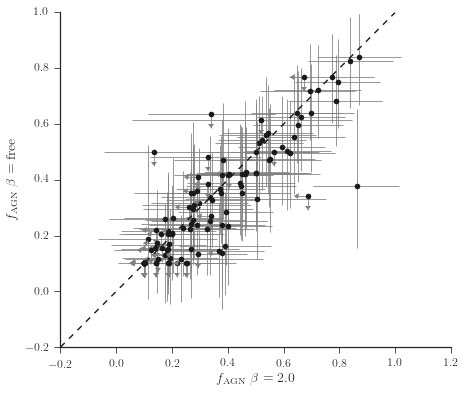

In [42]:
# Figure 1: Comparing the AGN fraction
srcs = bat_casey_beta_free.index
ind = (bat_c12.loc[srcs, 'agn_frac_flag'] == 0) & (bat_c12_beta_free['agn_frac_flag'] == 0)
ind2 = (bat_c12.loc[srcs, 'agn_frac_flag'] == 0) & (bat_c12_beta_free['agn_frac_flag'] == -1)
ind3 = (bat_c12.loc[srcs, 'agn_frac_flag'] == -1) & (bat_c12_beta_free['agn_frac_flag'] == 0)
ind4 = (bat_c12.loc[srcs, 'agn_frac_flag'] == -1) & (bat_c12_beta_free['agn_frac_flag'] == -1)

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
ax1.errorbar(bat_c12.loc[srcs, 'agn_frac'][ind], bat_c12_beta_free['agn_frac'][ind],
             xerr=np.vstack([bat_c12.loc[srcs, 'agn_frac_err_low'][ind], bat_c12.loc[srcs, 'agn_frac_err_high'][ind]]),
             yerr=np.vstack([bat_c12_beta_free['agn_frac_err_low'][ind], bat_c12_beta_free['agn_frac_err_high'][ind]]),
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8)
ax1.errorbar(bat_c12.loc[srcs, 'agn_frac'][ind2], bat_c12_beta_free['agn_frac'][ind2],
             xerr=np.vstack([bat_c12.loc[srcs, 'agn_frac_err_low'][ind2], bat_c12.loc[srcs, 'agn_frac_err_high'][ind2]]),
             uplims=np.ones(9, dtype=np.bool), ls='None', color='k', fmt='o', ecolor='grey', elinewidth=0.8, yerr=0.05)
ax1.errorbar(bat_c12.loc[srcs, 'agn_frac'][ind3], bat_c12_beta_free['agn_frac'][ind3], xerr=0.05,
             yerr=np.vstack([bat_c12_beta_free['agn_frac_err_low'][ind3], bat_c12_beta_free['agn_frac_err_high'][ind3]]),
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8, xuplims=np.ones(sum(ind3), dtype=np.bool))
ax1.errorbar(bat_c12.loc[srcs, 'agn_frac'][ind4], bat_c12_beta_free['agn_frac'][ind4], xerr=0.05, yerr=0.05,
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8, uplims=np.ones(sum(ind4), dtype=np.bool),
             xuplims=np.ones(sum(ind4), dtype=np.bool))

ax1.plot(np.arange(-0.2, 1.0, 0.001), np.arange(-0.2, 1.0, 0.001), 'k--')

ax1.set_xlabel(r'$f_{\rm AGN}$ $\beta=2.0$', fontsize=14)
ax1.set_ylabel(r'$f_{\rm AGN}$ $\beta=\rm{free}$', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()

fig.savefig(figsave_dir+'fagn_comparison_beta_free.eps', bbox_inches='tight')

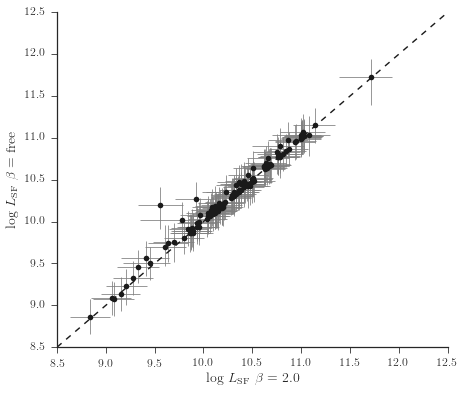

In [43]:
# Figure 2: LSF comparison
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
ax1.errorbar(bat_c12.loc[srcs, 'lir_sf'], bat_c12_beta_free['lir_sf'],
             xerr=np.vstack([bat_c12.loc[srcs, 'lir_sf_err_low'], bat_c12.loc[srcs, 'lir_sf_err_high']]),
             yerr=np.vstack([bat_c12_beta_free['lir_sf_err_low'], bat_c12_beta_free['lir_sf_err_high']]),
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8)

ax1.plot(np.arange(8.5, 12.5, 0.001), np.arange(8.5, 12.5, 0.001), 'k--')
sn.despine()
ax1.set_xlabel(r'$\log\,L_{\rm SF}$ $\beta=2.0$', fontsize=14)
ax1.set_ylabel(r'$\log\,L_{\rm SF}$ $\beta=\rm{free}$', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
fig.savefig(figsave_dir+'lsf_comparison_beta_free.eps', bbox_inches='tight')

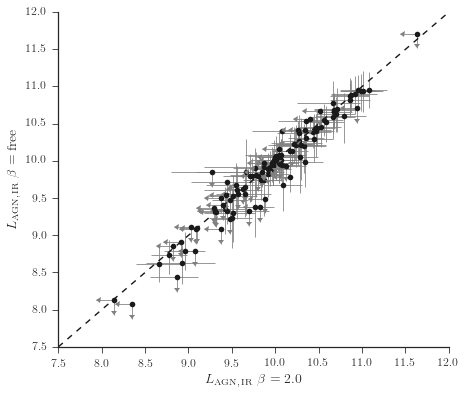

In [44]:
# Figure 3: LAGN comparison
srcs = bat_casey_beta_free.index
ind = (bat_c12.loc[srcs, 'lir_agn_flag'] == 0) & (bat_c12_beta_free['lir_agn_flag'] == 0)
ind2 = (bat_c12.loc[srcs, 'lir_agn_flag'] == 0) & (bat_c12_beta_free['lir_agn_flag'] == -1)
ind3 = (bat_c12.loc[srcs, 'lir_agn_flag'] == -1) & (bat_c12_beta_free['lir_agn_flag'] == 0)
ind4 = (bat_c12.loc[srcs, 'lir_agn_flag'] == -1) & (bat_c12_beta_free['lir_agn_flag'] == -1)

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
ax1.errorbar(bat_c12.loc[srcs, 'lir_agn'][ind], bat_c12_beta_free['lir_agn'][ind],
             xerr=np.vstack([bat_c12.loc[srcs, 'lir_agn_err_low'][ind], bat_c12.loc[srcs, 'lir_agn_err_high'][ind]]),
             yerr=np.vstack([bat_c12_beta_free['lir_agn_err_low'][ind], bat_c12_beta_free['lir_agn_err_high'][ind]]),
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8)
ax1.errorbar(bat_c12.loc[srcs, 'lir_agn'][ind2], bat_c12_beta_free['lir_agn'][ind2],
             xerr=np.vstack([bat_c12.loc[srcs, 'lir_agn_err_low'][ind2], bat_c12.loc[srcs, 'lir_agn_err_high'][ind2]]),
             uplims=np.ones(9, dtype=np.bool), ls='None', color='k', fmt='o', ecolor='grey', elinewidth=0.8, yerr=0.2)
ax1.errorbar(bat_c12.loc[srcs, 'lir_agn'][ind3], bat_c12_beta_free['lir_agn'][ind3], xerr=0.2,
             yerr=np.vstack([bat_c12_beta_free['agn_frac_err_low'][ind3], bat_c12_beta_free['lir_agn_err_high'][ind3]]),
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8, xuplims=np.ones(sum(ind3), dtype=np.bool))
ax1.errorbar(bat_c12.loc[srcs, 'lir_agn'][ind4], bat_c12_beta_free['lir_agn'][ind4], xerr=0.2, yerr=0.2,
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8, uplims=np.ones(sum(ind4), dtype=np.bool),
             xuplims=np.ones(sum(ind4), dtype=np.bool))

ax1.plot(np.arange(7.5, 12.0, 0.001), np.arange(7.5, 12.0, 0.001), 'k--')

ax1.set_xlabel(r'$L_{\rm AGN,\,IR}$ $\beta=2.0$', fontsize=14)
ax1.set_ylabel(r'$L_{\rm AGN,\,IR}$ $\beta=\rm{free}$', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()
fig.savefig(figsave_dir+'lagnir_comparison_beta_free.eps', bbox_inches='tight')

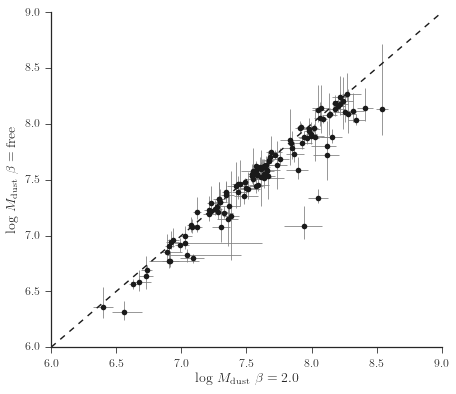

In [45]:
# Figure 4: Compare Mdust
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
ax1.errorbar(bat_c12.loc[srcs, 'mdust'], bat_c12_beta_free['mdust'],
             xerr=np.vstack([bat_c12.loc[srcs, 'mdust_err_low'], bat_c12.loc[srcs, 'mdust_err_high']]),
             yerr=np.vstack([bat_c12_beta_free['mdust_err_low'], bat_c12_beta_free['mdust_err_high']]),
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8)

ax1.plot(np.arange(6.0, 9.0, 0.001), np.arange(6.0, 9.0, 0.001), 'k--')

ax1.set_xlabel(r'$\log\,M_{\rm dust}$ $\beta=2.0$', fontsize=14)
ax1.set_ylabel(r'$\log\,M_{\rm dust}$ $\beta=\rm{free}$', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()

fig.savefig(figsave_dir+'mdust_comparison_beta_free.eps', bbox_inches='tight')

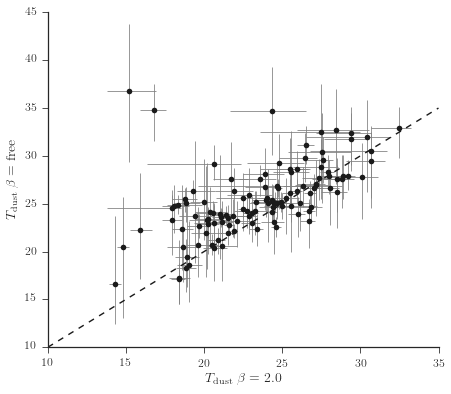

In [47]:
# Figure 4: Compare Tdust
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
ax1.errorbar(bat_c12.loc[srcs, 'tdust'], bat_c12_beta_free['tdust'],
             xerr=np.vstack([bat_c12.loc[srcs, 'tdust_err_low'], bat_c12.loc[srcs, 'tdust_err_high']]),
             yerr=np.vstack([bat_c12_beta_free['tdust_err_low'], bat_c12_beta_free['tdust_err_high']]),
             fmt='o', ls='None', color='k', ecolor='grey', elinewidth=0.8)

ax1.plot(np.arange(10.0, 35.0, 0.001), np.arange(10.0, 35.0, 0.001), 'k--')

ax1.set_xlabel(r'$T_{\rm dust}$ $\beta=2.0$', fontsize=14)
ax1.set_ylabel(r'$T_{\rm dust}$ $\beta=\rm{free}$', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()

fig.savefig(figsave_dir+'tdust_comparison_beta_free.eps', bbox_inches='tight')

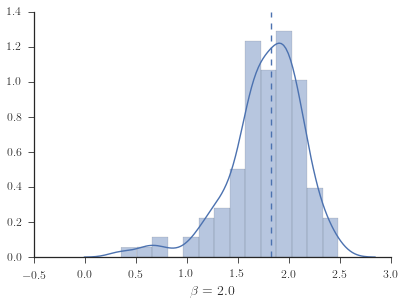

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
sn.distplot(bat_c12_beta_free['beta'])
sn.despine()

ax.axvline(bat_c12_beta_free['beta'].median(), color='b', ls='dashed')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(r'$\beta=2.0$', fontsize=14)

In [6]:
bat_c12_beta_free['beta'].std()

0.36553047212593226